In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import urllib.request
from tqdm import tqdm
import pandas as pd

%matplotlib inline

#  Quadratic Assignment Problem

## 1. Read data

Popular QAP with loss function minimums: <br>
- Nug12 12 578 (OPT) (12,7,9,3,4,8,11,1,5,6,10,2) 
- Nug14 14 1014 (OPT) (9,8,13,2,1,11,7,14,3,4,12,5,6,10) 
- Nug15 15 1150 (OPT) (1,2,13,8,9,4,3,14,7,11,10,15,6,5,12) 
- Nug16a 16 1610 (OPT) (9,14,2,15,16,3,10,12,8,11,6,5,7,1,4,13) 
- Nug16b 16 1240 (OPT) (16,12,13,8,4,2,9,11,15,10,7,3,14,6,1,5) 
- Nug17 17 1732 (OPT) (16,15,2,14,9,11,8,12,10,3,4,1,7,6,13,17,5) 
- Nug18 18 1930 (OPT) (10,3,14,2,18,6,7,12,15,4,5,1,11,8,17,13,9,16) 
- Nug20 20 2570 (OPT) (18,14,10,3,9,4,2,12,11,16,19,15,20,8,13,17,5,7,1,6) 
- Nug21 21 2438 (OPT) (4,21,3,9,13,2,5,14,18,11,16,10,6,15,20,19,8,7,1,12,17) 
- Nug22 22 3596 (OPT) (2,21,9,10,7,3,1,19,8,20,17,5,13,6,12,16,11,22,18,14,15) 
- Nug24 24 3488 (OPT) (17,8,11,23,4,20,15,19,22,18,3,14,1,10,7,9,16,21,24,12,6,13,5,2) 
- Nug25 25 3744 (OPT) (5,11,20,15,22,2,25,8,9,1,18,16,3,6,19,24,21,14,7,10,17,12,4,23,13) * 
- Nug27 27 5234 (OPT) (23,18,3,1,27,17,5,12,7,15,4,26,8,19,20,2,24,21,14,10,9,13,22,25,6,16,11) * 
- Nug28 28 5166 (OPT) (18,21,9,1,28,20,11,3,13,12,10,19,14,22,15,2,25,16,4,23,7,17,24,26,5,27,8,6) * 
- Nug30 30 6124 (OPT) (5 12 6 13 2 21 26 24 10 9 29 28 17 1 8 7 19 25 23 22 11 16 30 4 15 18 27 3 14 20)

In [2]:
def get_nug(no):
    QAP_INSTANCE_URL = f'http://anjos.mgi.polymtl.ca/qaplib/data.d/nug{no}.dat'
    qap_instance_file = urllib.request.urlopen(QAP_INSTANCE_URL)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
  

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
  

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
  
    return n, A, B

In [3]:
n, A, B = get_nug(12)

print('Problem size: %d' % n)
print('Flow matrix:\n', A)
print('Distance matrix:\n', B)

Problem size: 12
Flow matrix:
 [[0. 1. 2. 3. 1. 2. 3. 4. 2. 3. 4. 5.]
 [1. 0. 1. 2. 2. 1. 2. 3. 3. 2. 3. 4.]
 [2. 1. 0. 1. 3. 2. 1. 2. 4. 3. 2. 3.]
 [3. 2. 1. 0. 4. 3. 2. 1. 5. 4. 3. 2.]
 [1. 2. 3. 4. 0. 1. 2. 3. 1. 2. 3. 4.]
 [2. 1. 2. 3. 1. 0. 1. 2. 2. 1. 2. 3.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 2. 1. 2.]
 [4. 3. 2. 1. 3. 2. 1. 0. 4. 3. 2. 1.]
 [2. 3. 4. 5. 1. 2. 3. 4. 0. 1. 2. 3.]
 [3. 2. 3. 4. 2. 1. 2. 3. 1. 0. 1. 2.]
 [4. 3. 2. 3. 3. 2. 1. 2. 2. 1. 0. 1.]
 [5. 4. 3. 2. 4. 3. 2. 1. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0.  5.  2.  4.  1.  0.  0.  6.  2.  1.  1.  1.]
 [ 5.  0.  3.  0.  2.  2.  2.  0.  4.  5.  0.  0.]
 [ 2.  3.  0.  0.  0.  0.  0.  5.  5.  2.  2.  2.]
 [ 4.  0.  0.  0.  5.  2.  2. 10.  0.  0.  5.  5.]
 [ 1.  2.  0.  5.  0. 10.  0.  0.  0.  5.  1.  1.]
 [ 0.  2.  0.  2. 10.  0.  5.  1.  1.  5.  4.  0.]
 [ 0.  2.  0.  2.  0.  5.  0. 10.  5.  2.  3.  3.]
 [ 6.  0.  5. 10.  0.  1. 10.  0.  0.  0.  5.  0.]
 [ 2.  4.  5.  0.  0.  1.  5.  0.  0.  0. 10. 10.]
 [ 1.  5.  2.  0.  5.  

## 2. Objective function

In [3]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p, p[i]]).sum()
    return s

In [96]:
p = [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]
print(qap_objective_function(p), p)

578.0 [11, 6, 8, 2, 3, 7, 10, 0, 4, 5, 9, 1]


# 3. Random Sampling

In [51]:
%%time

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in tqdm(range(T)):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = qap_objective_function(permutations[i, :])

p = permutations[costs.argmin(), :]
print(qap_objective_function(p), p)

100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [01:30<00:00, 11082.18it/s]


594.0 [ 4  6  3 11  5 10  7  8  9  1  0  2]
Wall time: 1min 30s


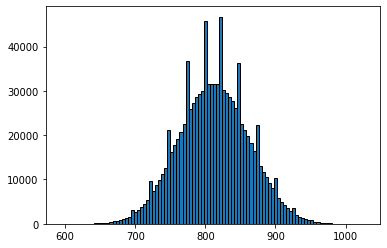

812.058624 49.733344098568544


In [56]:
plt.figure()
plt.hist(costs, bins=100, edgecolor='black')
plt.show()

print(costs.mean(), costs.std())

## 4. Simulated Annealing

In [110]:
def qap_objective_function(p):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p, p[i]]).sum()
    return s

In [104]:
q = p.copy()

i, j = 4, 8
q[i], q[j] = q[j], q[i]

In [112]:
qap_objective_function(q)

654.0

In [118]:
qap_objective_function(p)

578.0

In [86]:
z = q.copy()
i, j = 2, 3
z[i], z[j] = z[j], z[i]
qap_objective_function(z)

682.0

In [126]:
def delta(p, r, s, A, B):
    n = len(p)
    ans = 0
    q = p.copy()
    q[r], q[s] = q[s], q[r]
    for i in range(n):
        for j in range(n):
            ans += A[i][j] * B[p[i], p[j]] - A[i][j] * B[q[i], q[j]]
    return -ans

In [223]:
def delta2(p, r, s, A, B):
    n = len(p)
    ans = 0
    for k in range(n):
        if k == r or k == s:
            continue
        ans += (A[s, k] - A[r, k]) * (B[p[s], p[k]] - B[p[r], p[k]])
        
    return -2 * ans

In [224]:
r, s = 4, 8
u, v = 2, 6

print(delta2(p, r, s, A, B))
print(delta2(q, u, v, A, B))

76.0
54.0


54.0

In [191]:
for u in range(n):
    for v in range(n):
        a = delta2(p, r, s, A, B)
        b = delta2(q, u, v, A, B)
        c = delta2(p, u, v, A, B) + 2 * (A[r, u] - A[r, v] + A[s, v] - A[s, u]) * (B[q[s], q[u]] - B[q[s], q[v]] + B[q[r], q[v]] - B[q[r], q[u]])
        if u in [r, s] or v in [r, s]:
            2 + 2
        else:
            if b != c:
                print(u, v)
                print(a)
                print(b)
                print(c)
                print()

In [4]:
class SA:
    def __init__(self, flow_m, dist_m, QAP_name='', T=10000, radius=1, alpha=1.0, cost_dist=False):
        self.T = T
        self.radius = radius
        self.alpha = alpha
        
        n1, n2 = flow_m.shape
        n3, n4 = dist_m.shape
        assert(n1 == n2 == n3 == n4)
        self.FLOW = flow_m
        self.DIST = dist_m
        self.n = n1
        
        self.last_perm = np.random.permutation(n1)
        self.act_perm =  self.last_perm.copy()
        self.r, self.s = 0, 1
        self.act_perm[0], self.act_perm[1] = self.act_perm[1], self.act_perm[0]
        
        self.p_cost = self.qap_objective_function(self.act_perm)
        self.costs = np.zeros(T)
        self.all_perms = [self.act_perm]
        self.all_jumps = []
        self.QAP_name = QAP_name
        self.cost_and_perms_dist = []
        self.cost_dist = cost_dist
        
        self.last_swap_costs = {}
        self.act_swap_costs = {}
        for u in range(self.n):
            for v in range(u, self.n):
                self.last_swap_costs[(u, v)] = self.delta(self.last_perm, u, v)
                self.act_swap_costs[(u, v)] = self.delta(self.act_perm, u, v)
        
    
    def delta(self, p, r, s):
        '''
        Change of Cost after swap(r, s)
        '''
        n = self.n
        A, B = self.FLOW, self.DIST
        ans = 0
        for k in range(n):
            if k == r or k == s:
                continue
            ans += (A[s, k] - A[r, k]) * (B[p[s], p[k]] - B[p[r], p[k]])

        return -2 * ans


    def qap_objective_function(self, p):
        s = 0.0
        for i in range(self.n):
            s += (self.FLOW[i, :] * self.DIST[p, p[i]]).sum()
        return s


    def random_neighbor(self):
        q = self.act_perm.copy()
        for r in range(self.radius):
            i, j = np.random.choice(self.n, 2, replace=False)
            q[i], q[j] = q[j], q[i]
        return q
    
    
    def run(self):
        for t in tqdm(range(self.T), desc='Simulated Annealing', position=0):
            good_jump, random_jump = 0, 0
            q = self.random_neighbor()
            q_cost = self.qap_objective_function(q)
            
       
            if(q_cost < self.p_cost):
                if self.cost_dist:
                    self.cost_and_perms_dist.append((self.p_cost - q_cost))
                    
                self.act_perm, self.p_cost = q, q_cost
                self.all_perms.append(self.act_perm)
                good_jump = 1
                
            elif(np.random.rand() < np.exp(-self.alpha * (q_cost - self.p_cost) * t / self.T)):
                self.act_perm, self.p_cost = q, q_cost
                self.all_perms.append(self.act_perm)
                random_jump = 1
                
            self.costs[t] = self.p_cost
            self.all_jumps.append((good_jump, random_jump))
            
    
    def update_swap_costs(self):
        cost = 0
        r, s = self.r, self.s
        A, B = self.FLOW, self.DIST
        q = self.act_perm
        
        self.last_swap_costs = self.act_swap_costs
        self.act_swap_costs = {}
        
        for u in range(self.n):
            for v in range(u, self.n):
                if u in [r, s] or v in [r, s]:
                    # calculate (u, v) swap cost in O(N)
                    self.act_swap_costs[(u, v)] = self.delta(self.act_perm, u, v)
                else:
                    # swap in O(1)
                    self.act_swap_costs[(u, v)] = self.last_swap_costs[u, v] \
                    + 2 * (A[r, u] - A[r, v] + A[s, v] - A[s, u]) \
                    * (B[q[s], q[u]] - B[q[s], q[v]] + B[q[r], q[v]] - B[q[r], q[u]])
    
    
    def run_faster(self):
        '''
        We make only single swaps per iter.
        Insted of calculating qap_objective_function in every iteration,
        we calculate cost of swapping every pair every time
        we change a state.
        
        qap_objective_function -> O(n^2) every itereation
        new approach -> O(n^2) only when we change a state
        '''
        for t in tqdm(range(self.T), desc='Simulated Annealing', position=0):
            good_jump, random_jump = 0, 0
            u, v = np.random.choice(self.n, 2, replace=False)
            q = self.act_perm.copy()
            q[u], q[v] = q[v], q[u]
            q_cost = self.act_swap_costs[(min(u, v), max(u, v))] + self.p_cost
            
#             if q_cost != self.qap_objective_function(q):
#                 print('IMPLEMENTATION DOES NOT WORK!!!')
       
            if(q_cost < self.p_cost):
                self.act_perm, self.p_cost = q, q_cost
                self.all_perms.append(self.act_perm)
                self.r, self.s = u, v
                self.last_perm = self.act_perm
                self.update_swap_costs()
                good_jump = 1
                
            elif(np.random.rand() < np.exp(-self.alpha * (q_cost - self.p_cost) * t / self.T)):
                self.act_perm, self.p_cost = q, q_cost
                self.all_perms.append(self.act_perm)
                self.r, self.s = u, v
                self.last_perm = self.act_perm
                self.update_swap_costs()
                random_jump = 1
                
            self.costs[t] = self.p_cost
            self.all_jumps.append((good_jump, random_jump))
            
            
    def plot_cost(self):
        plt.figure(figsize=(15, 5))
        plt.plot(self.costs)
        plt.title('Cost function ' + self.QAP_name)
        plt.show()
        
    
    def plot_hist(self, bins):
        plt.figure(figsize=(15, 5))
        plt.hist(self.costs, bins=bins, edgecolor='black')
        plt.title('Cost function histogram ' + self.QAP_name)
        plt.show()
        
        
    def plot_jumps(self):
        x = np.array(self.all_jumps).reshape(-1, 50)
        x = x.sum(axis=1)

        f, ax = plt.subplots(2,1, figsize=(15,10))
        ax[0].bar(range(x.shape[0]), x, color='green')
        ax[1].bar(range(x.shape[0]), x, color='red')
        ax[0].set_title('Successes')
        ax[1].set_title('Accepted failures')
        plt.show()
        
        
    def plot_all(self, bins):
        self.plot_cost()
        self.plot_hist(bins=bins)
        self.plot_jumps()

### 4.1 Basic implementation

In [100]:
%%time

n, A, B = get_nug(12)
simulation = SA(flow_m=A, dist_m=B, QAP_name='nug12', T=500000, cost_dist=True)
simulation.run()

Simulated Annealing: 100%|███████████████████████████████████████████████████| 500000/500000 [01:01<00:00, 8138.42it/s]


Wall time: 1min 1s


In [101]:
simulation.costs.min()

578.0

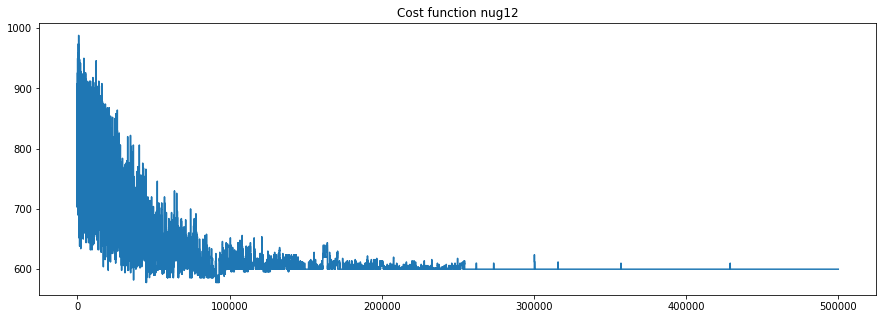

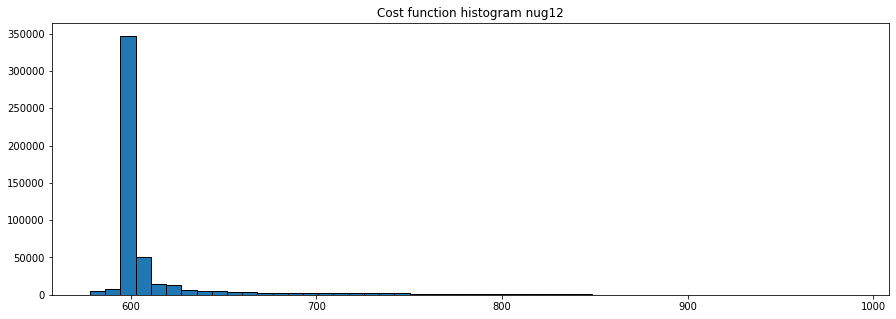

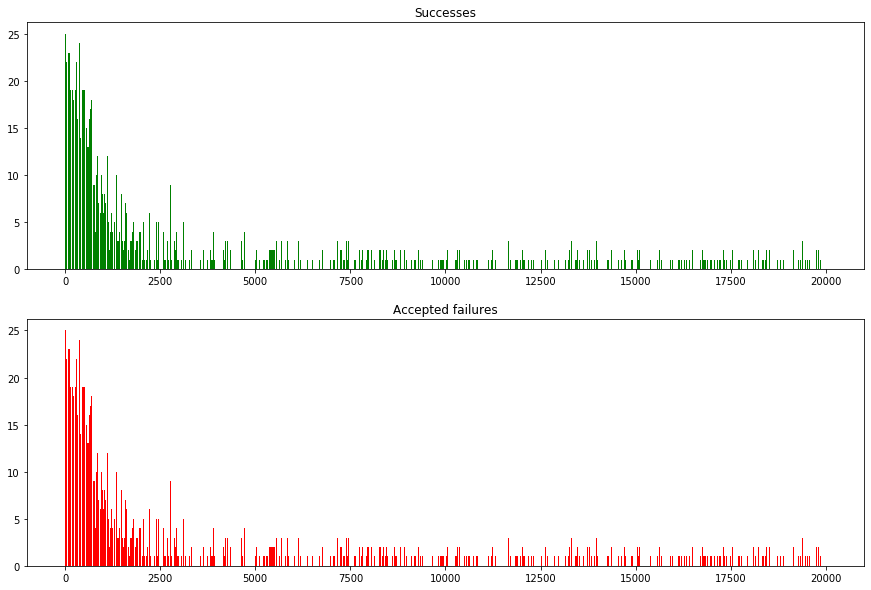

In [32]:
simulation.plot_all(bins=50)

### 4.2 Improved implementation based on
https://arxiv.org/pdf/1111.1353.pdf

In [90]:
%%time

n, A, B = get_nug(12)
simulation = SA(flow_m=A, dist_m=B, QAP_name='nug12', T=500000)
simulation.run_faster()

Simulated Annealing: 100%|██████████████████████████████████████████████████| 500000/500000 [00:44<00:00, 11117.41it/s]


Wall time: 45.2 s


In [91]:
simulation.costs.min()

578.0

## 5. Parameters tunning

### 5.1 Radius

In [107]:
%%time
scores_r = []

for r in range(1, 20):
    print(f'r: {r}')
    n, A, B = get_nug(12)
    simulation = SA(flow_m=A, dist_m=B, QAP_name='nug12', T=200000, radius=r, cost_dist=True)
    simulation.run()
    scores_r.append((r, simulation.costs, simulation.cost_and_perms_dist))

r: 1


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:26<00:00, 7663.33it/s]


r: 2


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:35<00:00, 5581.21it/s]


r: 3


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:44<00:00, 4476.03it/s]


r: 4


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:53<00:00, 3722.38it/s]


r: 5


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:02<00:00, 3206.11it/s]


r: 6


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:11<00:00, 2789.93it/s]


r: 7


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:20<00:00, 2478.42it/s]


r: 8


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:29<00:00, 2243.72it/s]


r: 9


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:37<00:00, 2043.64it/s]


r: 10


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:46<00:00, 1873.72it/s]


r: 11


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:55<00:00, 1738.90it/s]


r: 12


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:02<00:00, 1632.33it/s]


r: 13


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:11<00:00, 1518.29it/s]


r: 14


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:22<00:00, 1401.98it/s]


r: 15


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:28<00:00, 1343.64it/s]


r: 16


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:38<00:00, 1259.81it/s]


r: 17


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:46<00:00, 1201.48it/s]


r: 18


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:57<00:00, 1129.49it/s]


r: 19


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [03:04<00:00, 1082.80it/s]


Wall time: 33min 41s


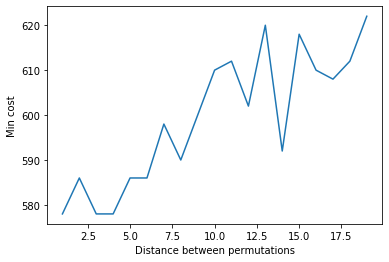

In [108]:
scores_r = np.array(scores_r)
plt.plot(scores_r[:, 0], list(map(lambda x: min(x), scores_r[:, 1])))
plt.xlabel('Distance between permutations')
plt.ylabel('Min cost')

# save scores
# pd.DataFrame(scores_r).to_csv('scores_for_different_radius.csv')

In [77]:
# scores_r = pd.read_csv('scores_for_different_radius.csv', names=['r', 'cost'],
#                        header=None).reset_index(drop=True).iloc[1:]

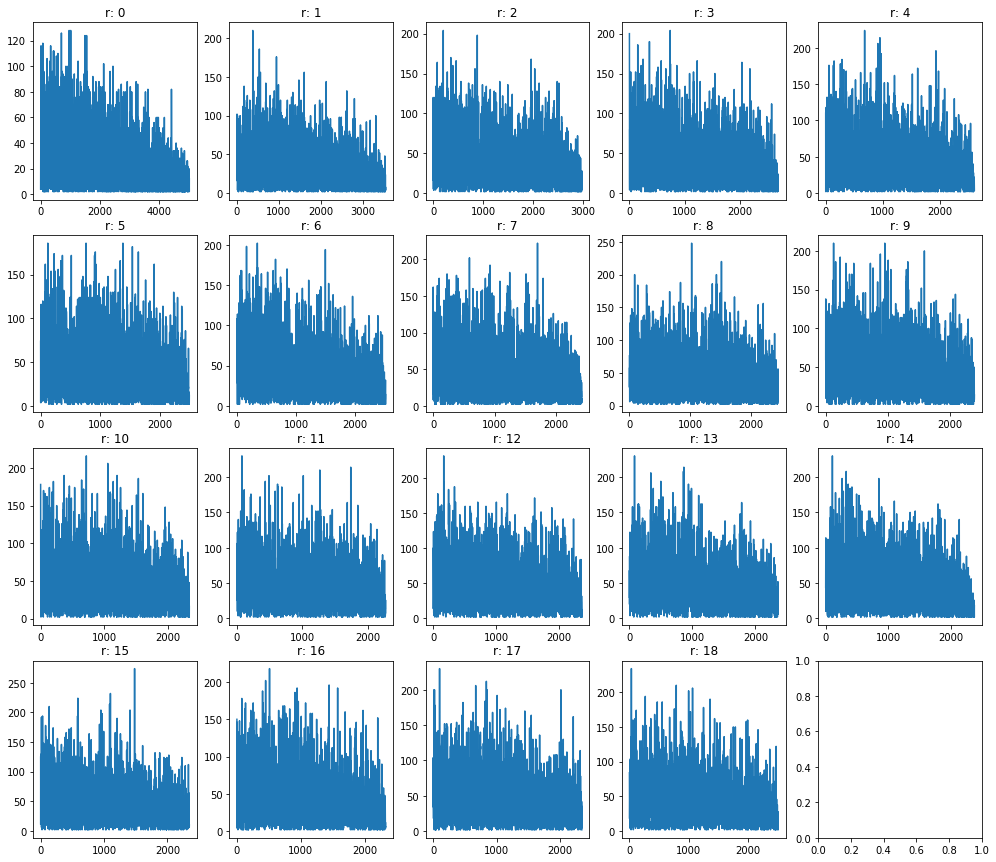

In [131]:
# distances between cost_f(perms) in successes

f, ax = plt.subplots(4, 5, figsize=(17,15))
for r in range(19):
    ax[r // 5, r % 5].plot(scores_r[:, 2][r])
    ax[r // 5, r % 5].set_title(f'r: {r}')

### 5.2 alpha

In [148]:
%%time

scores_a = []
alphas = [0.01, 0.02, 0.03, 0.05, 0.1, 0.2, 0.3, 0.5, 0.7, 1.01, 1.03, 1.05, 1.1, 1.2, 1.4, 1.5, 1.7, 2, 4, 5, 10]
for a in alphas:
    print(f'alpha: {a}')
    n, A, B = get_nug(12)
    simulation = SA(flow_m=A, dist_m=B, QAP_name='nug12', T=200000, alpha=a)
    simulation.run_faster()
    scores_a.append(simulation.costs)

alpha: 0.01


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:10<00:00, 1532.04it/s]


alpha: 0.02


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [02:00<00:00, 1653.07it/s]


alpha: 0.03


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:51<00:00, 1786.77it/s]


alpha: 0.05


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:35<00:00, 2089.38it/s]


alpha: 0.1


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [01:08<00:00, 2924.04it/s]


alpha: 0.2


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:44<00:00, 4501.95it/s]


alpha: 0.3


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:33<00:00, 5888.03it/s]


alpha: 0.5


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:25<00:00, 7967.46it/s]


alpha: 0.7


Simulated Annealing: 100%|███████████████████████████████████████████████████| 200000/200000 [00:22<00:00, 9038.80it/s]


alpha: 1.01


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:18<00:00, 10672.69it/s]


alpha: 1.03


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:17<00:00, 11266.53it/s]


alpha: 1.05


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:18<00:00, 10938.51it/s]


alpha: 1.1


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:17<00:00, 11526.12it/s]


alpha: 1.2


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:19<00:00, 10414.40it/s]


alpha: 1.4


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:16<00:00, 12285.61it/s]


alpha: 1.5


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:15<00:00, 12756.63it/s]


alpha: 1.7


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:15<00:00, 12675.10it/s]


alpha: 2


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:14<00:00, 13371.53it/s]


alpha: 4


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:13<00:00, 15337.08it/s]


alpha: 5


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:12<00:00, 15667.86it/s]


alpha: 10


Simulated Annealing: 100%|██████████████████████████████████████████████████| 200000/200000 [00:11<00:00, 16729.08it/s]


Wall time: 14min 10s


In [150]:
# save scores

# pd.DataFrame(scores_a).to_csv('scores_for_different_alpha.csv')

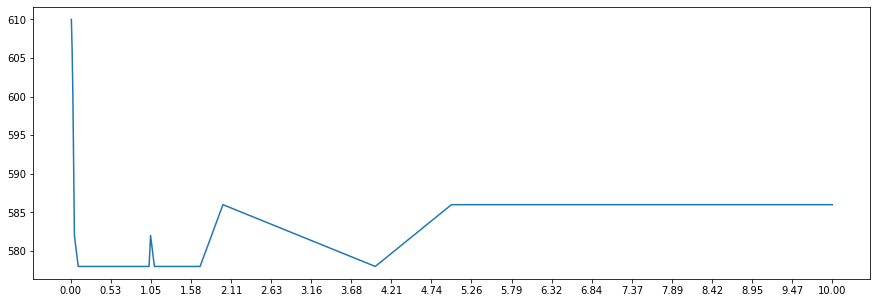

In [154]:
scores_a = np.array(scores_a)
plt.figure(figsize=(15, 5))
plt.xticks(np.linspace(0, 10, 20))
plt.plot(alphas, scores_a.min(axis=1))

In [160]:
for i, a in enumerate(alphas):
    print(a, ' -> ', scores_a.min(axis=1)[i])

0.01  ->  610.0
0.02  ->  606.0
0.03  ->  600.0
0.05  ->  582.0
0.1  ->  578.0
0.2  ->  578.0
0.3  ->  578.0
0.5  ->  578.0
0.7  ->  578.0
1.01  ->  578.0
1.03  ->  578.0
1.05  ->  582.0
1.1  ->  578.0
1.2  ->  578.0
1.4  ->  578.0
1.5  ->  578.0
1.7  ->  578.0
2  ->  586.0
4  ->  578.0
5  ->  586.0
10  ->  586.0


## 6. SA on different QAP

In [5]:
from urllib.error import HTTPError

nugs = []
for i in range(12, 30):
    try:
        x = get_nug(i)
        nugs.append(x)
        print(f'Nug {i} appended!')
    except HTTPError:
        print(f'Nug {i} wasn t found :c')

Nug 12 appended!
Nug 13 wasn t found :c
Nug 14 appended!
Nug 15 appended!
Nug 16 wasn t found :c
Nug 17 appended!
Nug 18 appended!
Nug 19 wasn t found :c
Nug 20 appended!
Nug 21 appended!
Nug 22 appended!
Nug 23 wasn t found :c
Nug 24 appended!
Nug 25 appended!
Nug 26 wasn t found :c
Nug 27 appended!
Nug 28 appended!
Nug 29 wasn t found :c


In [12]:
%%time

SCORES = []
for n, A, B in nugs:
    print(f'Running nug: {n}')
    simulation = SA(flow_m=A, dist_m=B, QAP_name=f'Nug {n}', T=1000000)
    simulation.run_faster()
    
    SCORES.append(simulation.costs)
    save_costs = pd.DataFrame(simulation.costs)
    save_costs.to_csv(f'scores_for_nug{n}.csv')

Running nug: 12


Simulated Annealing: 100%|████████████████████████████████████████████████| 1000000/1000000 [01:30<00:00, 11078.24it/s]


Running nug: 14


Simulated Annealing: 100%|████████████████████████████████████████████████| 1000000/1000000 [01:38<00:00, 10103.00it/s]


Running nug: 15


Simulated Annealing: 100%|████████████████████████████████████████████████| 1000000/1000000 [01:39<00:00, 10094.53it/s]


Running nug: 17


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [01:53<00:00, 8792.56it/s]


Running nug: 18


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [01:53<00:00, 8821.39it/s]


Running nug: 20


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [01:58<00:00, 8417.23it/s]


Running nug: 21


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [02:02<00:00, 8134.50it/s]


Running nug: 22


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [01:57<00:00, 8490.82it/s]


Running nug: 24


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [02:09<00:00, 7746.91it/s]


Running nug: 25


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [02:30<00:00, 6649.90it/s]


Running nug: 27


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [02:19<00:00, 7179.75it/s]


Running nug: 28


Simulated Annealing: 100%|█████████████████████████████████████████████████| 1000000/1000000 [02:22<00:00, 7010.09it/s]


Wall time: 24min 17s


In [17]:
SCORES = np.array(SCORES)

n, m = SCORES.shape
n, m

(12, 1000000)

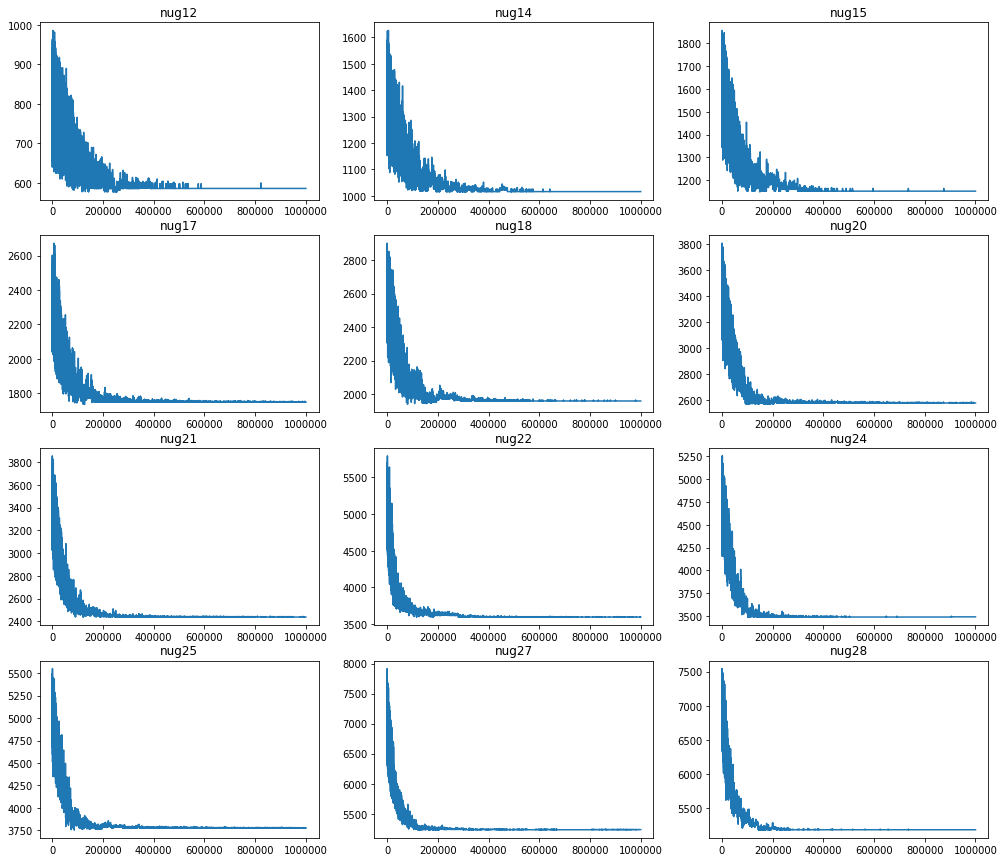

In [22]:
f, ax = plt.subplots(4, 3, figsize=(17,15))
for i in range(n):
    ax[i // 3, i % 3].plot(SCORES[i])
    ax[i // 3, i % 3].set_title(f'nug{nugs[i][0]}')

In [25]:
print('Min cost:')
for i, s in enumerate(SCORES.min(axis=1)):
    print(f'nug{nugs[i][0]}: {s}')

Min cost:
nug12: 578.0
nug14: 1016.0
nug15: 1150.0
nug17: 1736.0
nug18: 1938.0
nug20: 2570.0
nug21: 2438.0
nug22: 3596.0
nug24: 3488.0
nug25: 3758.0
nug27: 5234.0
nug28: 5186.0
